<a href="https://colab.research.google.com/github/vggls/msc_thesis_medical_xai/blob/main/experiments/ham10k_resnet50/Attribution_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Imports**

In [ ]:
pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38262 sha256=8bd33a7b07abdebadd93fa019e3391952106e900b39626661645c32b8c8367ff
  Stored in directory: /root/.cache/pip/wheels/9b/ae/bd/221d138b169c4867b2ae5c893474d0b23bae6e4750bc95bc55
Successfully built grad-cam


In [ ]:
import shutil
import pickle
import random
import matplotlib.pyplot as plt

import torch
from torchvision  import transforms

from pytorch_grad_cam import GradCAM, HiResCAM

In [ ]:
# custom written code
from ham10k import map_images_to_paths, create_datasets, summaries
from plot_tensor import convert_for_plot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Download from Kaggle**


In [ ]:
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download kmader/skin-cancer-mnist-ham10000

100% 5.20G/5.20G [02:17<00:00, 41.1MB/s]
100% 5.20G/5.20G [02:17<00:00, 40.6MB/s]


In [ ]:
! unzip skin-cancer-mnist-ham10000.zip

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflatin

# **3. Test dataset**

In [ ]:
#shutil.rmtree('./test_dataset')

In [ ]:
# to be applied to training data
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),          #recommended size
    transforms.RandomHorizontalFlip(),      #data augmentation
    transforms.RandomVerticalFlip(),        #data augmentation
    transforms.RandomRotation(degrees=20),  #data augmentation
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor([0.5, 0.5, 0.5]), torch.Tensor([0.5, 0.5, 0.5]))
])
# to be applied to validation and test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor([0.5, 0.5, 0.5]), torch.Tensor([0.5, 0.5, 0.5]))
])

In [ ]:
dataframe = map_images_to_paths()

In [ ]:
train_dataset, validation_dataset, test_dataset= create_datasets(dataframe = dataframe,
                                                                 train_transforms = train_transforms,
                                                                 test_transforms = test_transforms)

In [ ]:
# do not need them in this notebook
shutil.rmtree('./training_dataset')
shutil.rmtree('./validation_dataset')

In [ ]:
classes = {'akiec': 'Actinic Keratoses (akiec)',
           'bcc': 'Basal Cell Carcinoma (bcc)',
           'bkl': 'Benign Keratosis-like Lesions (bkl)',
           'df': 'Dermatofibroma (df)',
           'nv': 'Melanocytic Nevi (nv)',
           'vasc': 'Pyogenic Granulomas and Hemorrhage (vasc)',
           'mel': 'Melanoma (mel)'}

# **4. ResNet50**

In [ ]:
model_path = './drive/MyDrive/Colab_Notebooks/dataset_models/HAM10000/Models/'
resnet50 = torch.load(model_path + 'ham10k_resnet50.pt')
resnet50 = resnet50.eval()
resnet50 = resnet50.cuda()

In [ ]:
gradcam_instance = GradCAM(model=resnet50, target_layers=[resnet50.layer4[2].conv3], use_cuda=True)
hirescam_instance = HiResCAM(model=resnet50, target_layers=[resnet50.layer4[2].conv3], use_cuda=True)

<ipython-input-22-2e27fd64a094>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 432x288 with 0 Axes>

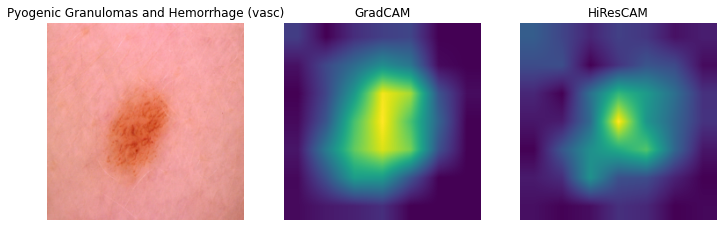

<Figure size 432x288 with 0 Axes>

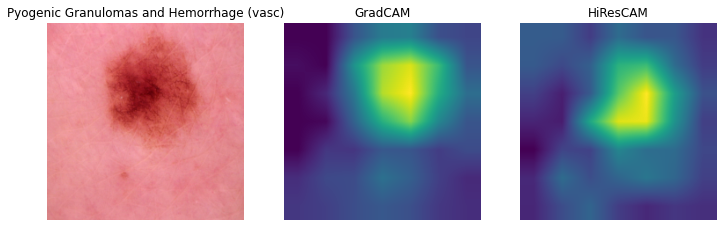

<Figure size 432x288 with 0 Axes>

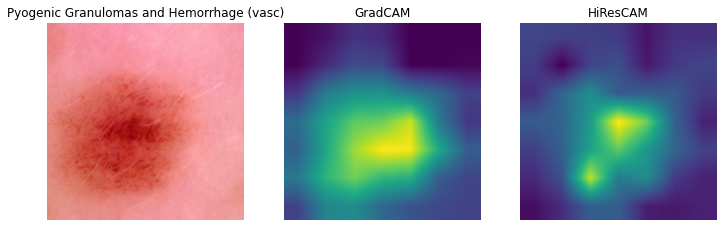

<Figure size 432x288 with 0 Axes>

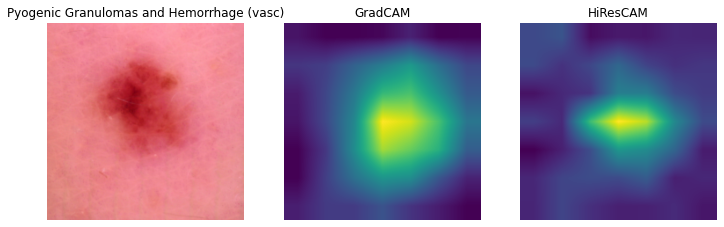

<Figure size 432x288 with 0 Axes>

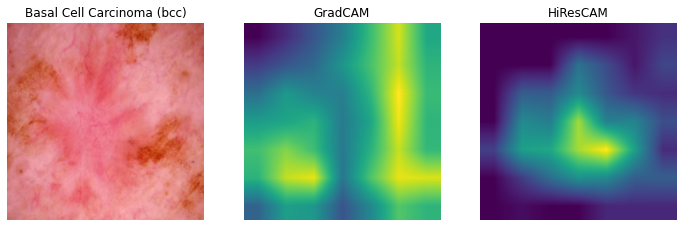

<Figure size 432x288 with 0 Axes>

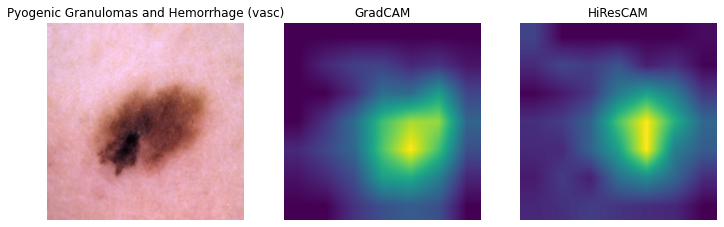

<Figure size 432x288 with 0 Axes>

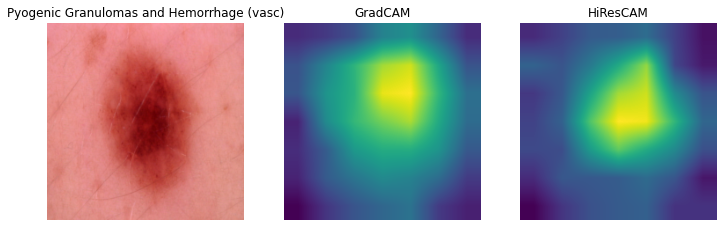

<Figure size 432x288 with 0 Axes>

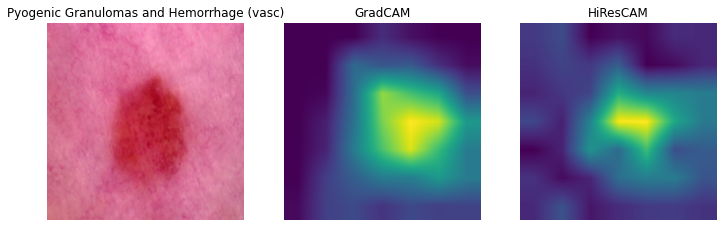

<Figure size 432x288 with 0 Axes>

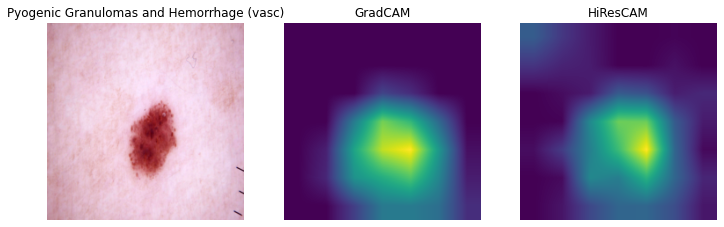

<Figure size 432x288 with 0 Axes>

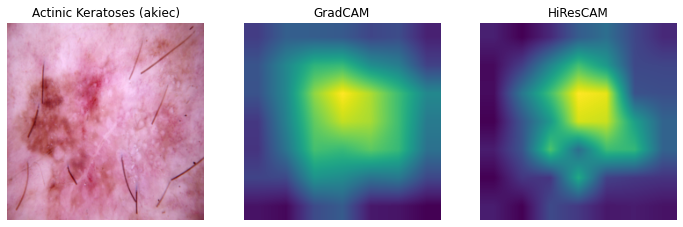

<Figure size 432x288 with 0 Axes>

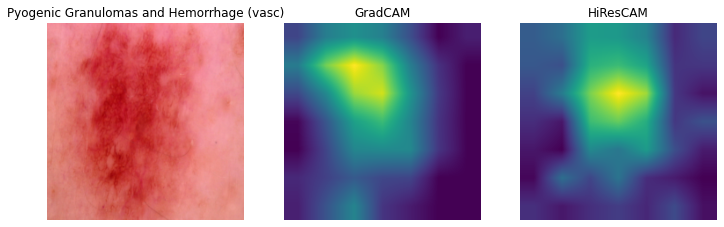

<Figure size 432x288 with 0 Axes>

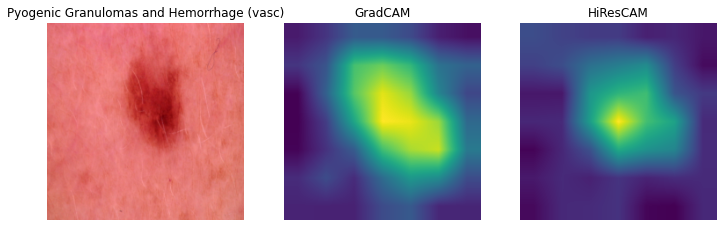

<Figure size 432x288 with 0 Axes>

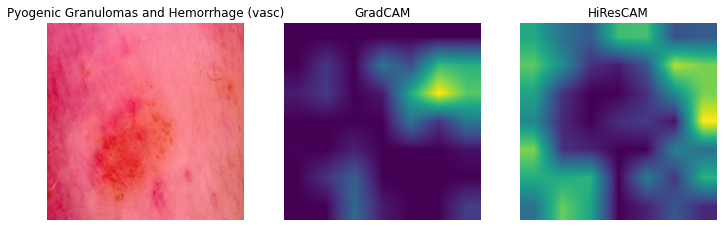

<Figure size 432x288 with 0 Axes>

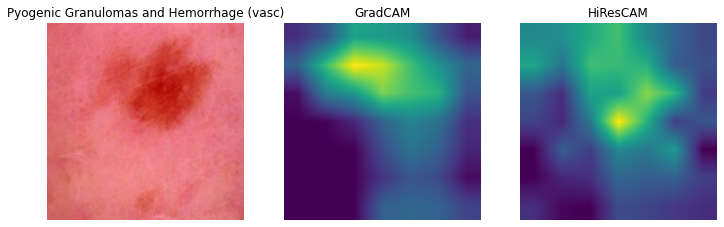

<Figure size 432x288 with 0 Axes>

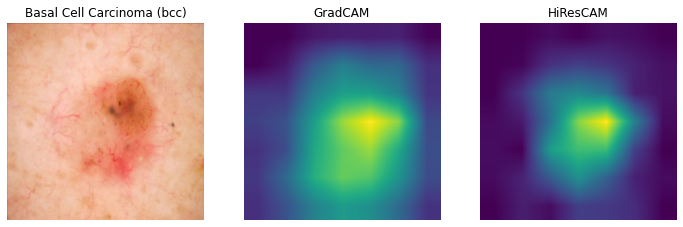

In [ ]:
i = 0

random_test_indices = random.sample(range(len(test_dataset)), 20) # 20 samples

for index in random_test_indices:

    image, label = test_dataset[index]
    image = image.cuda()

    if label==int(torch.argmax(resnet50(image.unsqueeze(0)))): #correctly classified

        i+=1

        clas = list(classes.values())[label]

        gradcam_attributions = gradcam_instance(input_tensor=image.unsqueeze(0))[0,:,:]
        hirescam_attributions = hirescam_instance(input_tensor=image.unsqueeze(0))[0,:,:]

        plt.figure()
        fig, ax = plt.subplots(1, 3, figsize=(12,4))
        ax[0].imshow(convert_for_plot(image)); ax[0].set_title('{}'.format(clas)); ax[0].axis('off')
        ax[1].imshow(gradcam_attributions); ax[1].set_title('GradCAM'); ax[1].axis('off')
        ax[2].imshow(hirescam_attributions); ax[2].set_title('HiResCAM'); ax[2].axis('off')

    if i==20:
        break